# Project : Investigate The Movie Database

## Introduction
### Dataset Description
>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.The columns included in this dataset are:
  - id
  - imdb_id
  - popularity
  - budget
  - revenue
  - original_title
  - cast
  - homepage
  - director
  - tagline
  - keywords
  - overview
  - runtime
  - genres
  - production_companies
  - release_date
  - vote_count
  - vote_average
  - release_year
  - budget_adj
  - revenue_adj

### Questions for analysis
> - What genres have higher user rating?
- What kinds of properties are associated with movies that have high revenues? 
- Are more movies with higher ratings more popular?
- What is the revenue statistics of movies with higher user ratings?
- What genre has the most revenue?
- Top 3 directors with the most movies?


In [1]:
#import all neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling

In [2]:
df = pd.read_csv(r'C:\Users\vanes\OneDrive\Desktop\DS Resources\Excel Files\tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Dropping columns that will not be needed in my analysis
df.drop(['id','imdb_id','homepage','tagline', 'keywords', 'production_companies', 'cast', 'overview', 'budget_adj', 'revenue_adj'], axis=1, inplace = True)
df

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Bruce Brown,95,Documentary,6/15/66,11,7.4,1966
10862,0.065543,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,12/21/66,20,5.7,1966
10863,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,1/1/66,11,6.5,1966
10864,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,11/2/66,22,5.4,1966


In [6]:
# checking the number of missing values in the dataset
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [7]:
# now we remove rows with missing values since the columns with missing values are non-numeric columns
df.dropna(inplace = True)

In [8]:
df.isnull().sum().any()

False

In [9]:
# reset the index so that it matches the number of rows in the dataset
df.reset_index(inplace=True)

In [10]:
# check if there are any duplicated rows in our dataset
df.duplicated().any()

False

In [11]:
df.shape

(10801, 12)

In [12]:
df.describe()

,index,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10801.000000,10801.000000,1.080100e+04,1.080100e+04,10801.000000,10801.000000,10801.00000,10801.000000
mean,5439.508101,0.649450,1.471255e+07,4.006196e+07,102.188779,218.590686,5.97079,2001.290343
std,3137.212993,1.002395,3.098568e+07,1.173144e+08,30.782604,577.139279,0.93301,12.819226
min,0.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.50000,1960.000000
25%,2726.000000,0.209163,0.000000e+00,0.000000e+00,90.000000,17.000000,5.40000,1995.000000
50%,5444.000000,0.385492,0.000000e+00,0.000000e+00,99.000000,39.000000,6.00000,2006.000000
75%,8156.000000,0.717479,1.577495e+07,2.453851e+07,111.000000,147.000000,6.60000,2011.000000
max,10865.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.20000,2015.000000


## Exploratory Data Analysis

### What genres have higher user rating?

In [13]:
df_copy = df.copy()

In [14]:
# since the genres column has more than one genre, we will split it according to the delimiter 
# to expand the dataframe
df_copy['genres'] = df_copy['genres'].str.split('|')
df_copy = df_copy.explode('genres').reset_index(drop=True)
cols = list(df_copy.columns)
cols.append(cols.pop(cols.index('release_year')))
df_copy = df_copy[cols]

In [15]:
# checking the average ratings according to the movie genre
avg_genre_rate = df_copy.groupby(['genres']).mean()['vote_average']
avg_genre_rate

genres
Action             5.785708
Adventure          5.936426
Animation          6.402312
Comedy             5.902988
Crime              6.124151
Documentary        6.906483
Drama              6.164942
Family             5.993377
Fantasy            5.860855
Foreign            5.987568
History            6.415060
Horror             5.337714
Music              6.466915
Mystery            5.948084
Romance            6.042213
Science Fiction    5.660376
TV Movie           5.741975
Thriller           5.750602
War                6.297778
Western            6.083537
Name: vote_average, dtype: float64

In [16]:
df_copy.genres.nunique()

20

There are 20 different genres in the dataset

In [17]:
# picking up the top 10 genres
avg_genre_rate.nlargest(n=10)

genres
Documentary    6.906483
Music          6.466915
History        6.415060
Animation      6.402312
War            6.297778
Drama          6.164942
Crime          6.124151
Western        6.083537
Romance        6.042213
Family         5.993377
Name: vote_average, dtype: float64

> This shows us the user ratings of various movie genres. It tends out that users more have more interest in **DOCUMENTARY**

### What kinds of properties are associated with movies that have high revenues?

In [18]:
# top 10 movies with the highest revenue 
high_revenue = df.nlargest(n = 10, columns = ['revenue'])
high_revenue

,index,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
1375,1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009
3,3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
5188,5231,4.355219,200000000,1845034188,Titanic,James Cameron,194,Drama|Romance|Thriller,11/18/97,4654,7.3,1997
4325,4361,7.637767,220000000,1519557910,The Avengers,Joss Whedon,143,Science Fiction|Action|Adventure,4/25/12,8903,7.3,2012
0,0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
4,4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015
14,14,5.944927,280000000,1405035767,Avengers: Age of Ultron,Joss Whedon,141,Action|Adventure|Science Fiction,4/22/15,4304,7.4,2015
3339,3374,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,David Yates,130,Adventure|Family|Fantasy,7/7/11,3750,7.7,2011
5378,5422,6.112766,150000000,1274219009,Frozen,Chris Buck|Jennifer Lee,102,Animation|Adventure|Family,11/27/13,3369,7.5,2013
5381,5425,4.946136,200000000,1215439994,Iron Man 3,Shane Black,130,Action|Adventure|Science Fiction,4/18/13,6882,6.9,2013


In [19]:
#average duration for movies with the highest revenue
high_revenue.runtime.mean()

139.9

> The average duration for the top 10 movies with the highest revenue is 139.9 minutes (2 hours 19 minutes 54 seconds)

In [20]:
hr_copy = high_revenue.copy()

In [21]:
hr_copy['genres'] = hr_copy['genres'].str.split('|')
hr_copy = hr_copy.explode('genres').reset_index(drop=True)
cols = list(hr_copy.columns)
cols.append(cols.pop(cols.index('release_year')))
hr_copy = hr_copy[cols]

In [22]:
hr_copy.head()

,index,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action,12/10/09,8458,7.1,2009
1,1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,Adventure,12/10/09,8458,7.1,2009
2,1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,Fantasy,12/10/09,8458,7.1,2009
3,1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,Science Fiction,12/10/09,8458,7.1,2009
4,3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,12/15/15,5292,7.5,2015


In [23]:
# finding the count of each genre associated with the top 10 high revenue movies
title_count = hr_copy.groupby(['genres'])['original_title'].count()
title_count

genres
Action             7
Adventure          8
Animation          1
Crime              1
Drama              1
Family             2
Fantasy            3
Romance            1
Science Fiction    6
Thriller           3
Name: original_title, dtype: int64

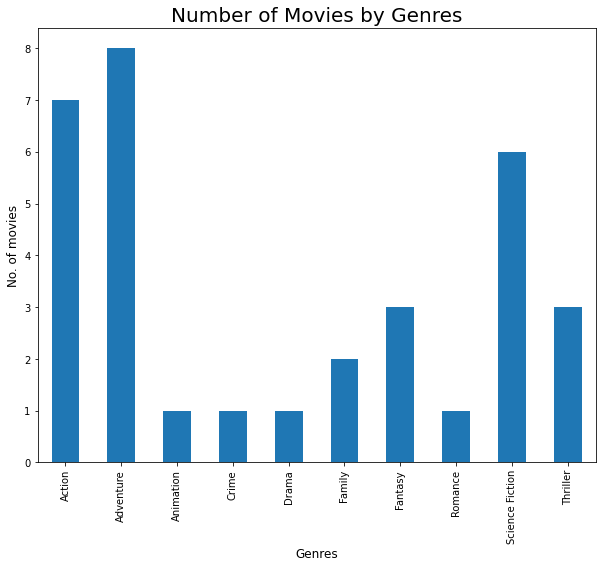

In [24]:
# plotting the genres of top 10 high revenue movies
plt.figure(figsize = (10,8))

title_count.plot(kind = 'bar')
plt.title('Number of Movies by Genres', size=20)
plt.xlabel('Genres', size = 12)
plt.ylabel('No. of movies', size = 12)

plt.show()

> From this we can deduce that, Adventure is the most common genres in the highest revenue movies

In [25]:
# how popular are movies with the highest revenue
high_revenue.popularity.mean()

9.763477899999998

>The average popularity rate for movies with the highest revenue is 9.8

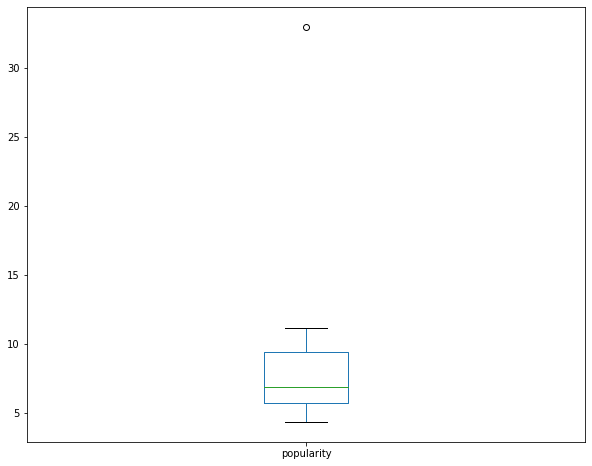

In [26]:
high_revenue.popularity.plot(kind = 'box', figsize = (10,8));

> The box plot gives us a clear view of what the popularity range in high revenue movies look like, with a median of about 7. 

In [27]:
# what is the average user rating on high revenue movies
high_revenue.vote_average.mean()

7.25

### Are more movies with higher ratings more popular?

In [28]:
# find the median rating, to help us determine what kind of user rating is high or low
df['vote_average'].median()

6.0

In [29]:
# now we will split the dataset into two, high and low using the median
high_rate = df.query('vote_average > 6.0')
high_rate.head()

,index,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [30]:
# define a function for plotting popularity with vote average
def scatter_plot(data):
    data.plot(x='vote_average', y='popularity', kind = 'scatter', figsize=(10,8))
    plt.title('Popularity by Vote Average', size = 20)
    plt.show()

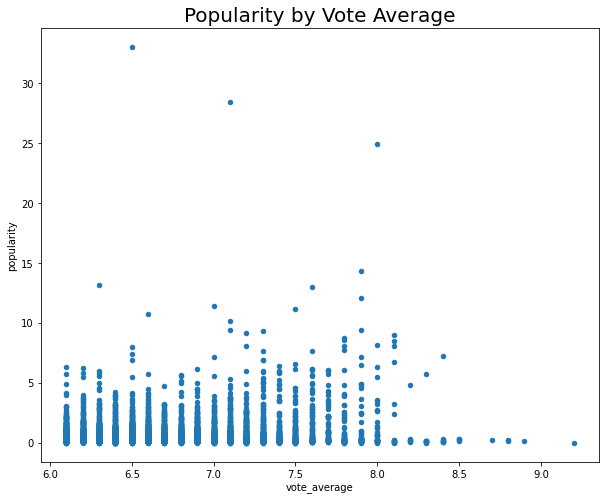

In [31]:
scatter_plot(high_rate)

In [32]:
low_rate = df.query('vote_average < 6.0')
low_rate.head()

,index,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
6,6,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015
11,11,6.189369,176000003,183987723,Jupiter Ascending,Lana Wachowski|Lilly Wachowski,124,Science Fiction|Fantasy|Action|Adventure,2/4/15,1937,5.2,2015
13,13,5.984995,88000000,243637091,Pixels,Chris Columbus,105,Action|Comedy|Science Fiction,7/16/15,1575,5.8,2015
23,23,4.710402,40000000,569651467,Fifty Shades of Grey,Sam Taylor-Johnson,125,Drama|Romance,2/11/15,1865,5.3,2015
41,41,3.080505,90000000,140396650,The Last Witch Hunter,Breck Eisner,106,Fantasy|Action|Adventure,10/21/15,879,5.6,2015


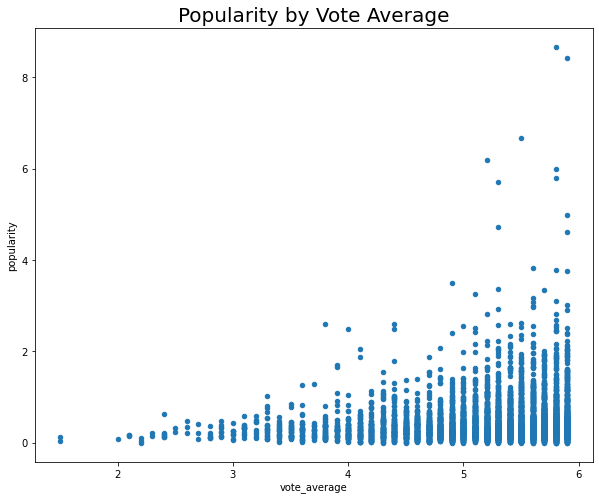

In [33]:
scatter_plot(low_rate)

In [34]:
# we will find the average popularity of both dataframes to determine which one is higher 
high_rate.popularity.mean()

0.8207628696147276

In [35]:
low_rate.popularity.mean()

0.47932113152152345

> Average popularity of both dataframes tells us that movies with higher user ratings are more popular than movies with lower user ratings. The visualizations also show that, because the high rate and low rate plot has maximum values of 30 and 8 respesctively. 

### What is the revenue statistics of movies with higher user ratings?

In [36]:
high_rate.describe()

,index,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,5269.000000,5269.000000,5.269000e+03,5.269000e+03,5269.000000,5269.000000,5269.000000,5269.000000
mean,5666.646233,0.820763,1.661876e+07,5.740658e+07,106.545455,338.067945,6.719264,1999.847599
std,3195.116181,1.313607,3.446967e+07,1.507422e+08,39.260772,772.320872,0.483316,13.735769
min,0.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,6.100000,1960.000000
25%,2905.000000,0.222923,0.000000e+00,0.000000e+00,92.000000,21.000000,6.300000,1992.000000
50%,5797.000000,0.438751,5.000000e+04,2.258610e+05,104.000000,58.000000,6.600000,2004.000000
75%,8458.000000,0.914278,1.800000e+07,4.161088e+07,118.000000,262.000000,7.000000,2011.000000
max,10863.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [37]:
# average revenue for highly rated movies
round(high_rate.revenue.mean(), 2)

57406579.93

In [38]:
# median revenue
high_rate.revenue.median()

225861.0

In [39]:
# maximum revenue
high_rate.revenue.max()

2781505847

### What genre has the most revenue?

In [40]:
# make a copy of the dataframe
gen_split = df.copy()

In [41]:
gen_split['genres'] = gen_split['genres'].str.split('|')
gen_split = gen_split.explode('genres').reset_index(drop=True)
cols = list(hr_copy.columns)
cols.append(cols.pop(cols.index('release_year')))
gen_split = gen_split[cols]

In [42]:
gen_split.head()

,index,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,6/9/15,5562,6.5,2015
1,0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,6/9/15,5562,6.5,2015
2,0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,6/9/15,5562,6.5,2015
3,0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,6/9/15,5562,6.5,2015
4,1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,5/13/15,6185,7.1,2015


In [43]:
# find the average revenue of each genre
avg_genre_revenue = gen_split.groupby(['genres']).mean()['revenue']
avg_genre_revenue

genres
Action             7.294813e+07
Adventure          1.135237e+08
Animation          7.601732e+07
Comedy             3.763248e+07
Crime              4.236938e+07
Documentary        2.085217e+06
Drama              2.926088e+07
Family             7.290698e+07
Fantasy            9.673609e+07
Foreign            1.485656e+06
History            3.220464e+07
Horror             1.683309e+07
Music              2.899821e+07
Mystery            4.026728e+07
Romance            3.576912e+07
Science Fiction    7.042787e+07
TV Movie           2.592593e+05
Thriller           4.175748e+07
War                4.760518e+07
Western            2.874291e+07
Name: revenue, dtype: float64

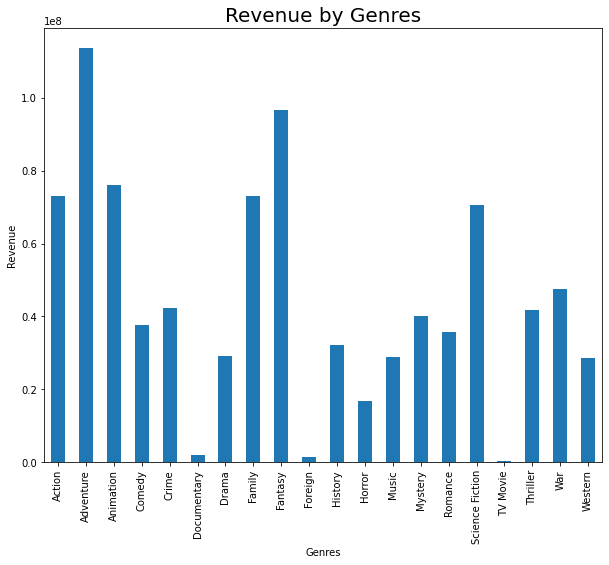

In [44]:
# plotting a bar graph to show which genre has the highest revenue
avg_genre_revenue.plot(x='genres', y= 'revenue', kind= 'bar', figsize=(10,8))
plt.xlabel('Genres')
plt.ylabel('Revenue')
plt.title('Revenue by Genres', size = 20)
plt.show()

> Hence Adventure has the highest revenue

### Top 3 directors with the most movies?

In [45]:
director_no = df.groupby(['director'])['original_title'].count()
director_no.nlargest(3)

director
Woody Allen        45
Clint Eastwood     34
Martin Scorsese    29
Name: original_title, dtype: int64

> **Woody Allen**, **Clint Eastwood** and **Martin Scorsese** are the top 3 directors with the most movies. 

## Conclusion

> There 20 different genres in the movie dataset, **Documentary** is the one with the highest user ratings. Highly rated movies tend to be more popular than movies with lower ratings. Adventure has the most revenue. Woody Allen is the director with the most movies

> Limitations : The vote count column and vote average does not really correlate since some higher vote counts have lower vote average and vice versa.

References : https://thewebdev.info/2022/03/26/how-to-split-text-in-a-column-into-multiple-rows-with-python-pandas/

In [64]:
gen_split.groupby(['genres', 'release_year']).max().sort_values('release_year').groupby(level = 1).max()

,index,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average
release_year,,,,,,,,,,
1960,10172,2.610362,12000000,60000000,Village of the Damned,Wolf Rilla,208,9/9/60,1180,8.0
1961,10140,2.631987,6000000,215880014,West Side Story,Yuri Chulyukin,186,9/25/61,913,7.5
1962,9880,3.170651,15000000,70000000,What Ever Happened to Baby Jane?,Vittorio De Sica|Federico Fellini|Luchino Visc...,216,9/26/62,560,7.7
1963,10471,2.508235,31115000,78898765,X: The Man with the X-Ray Eyes,Wolfgang Reitherman,248,9/18/63,486,7.5
1964,9922,3.153791,17000000,124900000,Zulu,Ubaldo Ragona|Sidney Salkow,170,9/4/64,804,7.7
1965,10723,1.910465,20000000,163214286,What's New Pussycat?,William Castle,199,9/9/65,620,7.6
1966,10865,1.227582,18000000,33736689,Winnie the Pooh and the Honey Tree,Woody Allen,182,9/6/66,286,7.9
1967,10437,2.550704,25000000,205843612,You Only Live Twice,Wolfgang Reitherman,152,9/1/67,928,7.6
1968,9757,3.309196,12000000,56715371,"Yours, Mine and Ours",William Wyler,155,9/26/68,1708,7.7


In [51]:
gen_split.groupby(['release_year', 'genres'])['popularity'].max()

release_year  genres         
1960          Action              1.872132
              Adventure           1.872132
              Comedy              0.947307
              Crime               0.423531
              Drama               2.610362
                                   ...    
2015          Science Fiction    32.985763
              TV Movie            0.516954
              Thriller           32.985763
              War                 5.476958
              Western             9.110700
Name: popularity, Length: 1047, dtype: float64